<a href="https://colab.research.google.com/github/Shahrukh2016/Retail_Sales_Prediction/blob/main/IndividualColab_RetailSalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1** -Manjiri Kulkurni
##### **Team Member 2** -Prasad Wagh
##### **Team Member 3** -Ashi Saxena

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

# Adding this to ignore future warnings
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset

df_rossmann= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/CP2_Retail Sales Prediction/Copy of Rossmann Stores Data.csv")
df_store= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/CP2_Retail Sales Prediction/Copy of store.csv")

### Dataset First View

In [6]:
# Dataset First Look of rossmann dataset
df_rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
# Dataset First Look of store dataset
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
print(f"Rossmann dataset: Rows={df_rossmann.shape[0]}, Columns={df_rossmann.shape[1]}") 
print(f"Store dataset: Rows={df_store.shape[0]}, Columns={df_store.shape[1]}") 

Rossmann dataset: Rows=1017209, Columns=9
Store dataset: Rows=1115, Columns=10


### Dataset Information

In [9]:
# Rossmann Dataset Info
df_rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
# Store Dataset Info
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
print(f"Number of duplicated rows in Rossmann dataset: {df_rossmann.duplicated().sum()}")
print(f"Number of duplicated rows in Store dataset: {df_store.duplicated().sum()}")

Number of duplicated rows in Rossmann dataset: 0
Number of duplicated rows in Store dataset: 0


We do not have any duplicated rows in both the dataset and that is very good for us.

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
print(f"Null values count in Rossmann dataset:\n{df_rossmann.isna().sum()}\n")
print(f"Null values count in Store dataset:\n{df_store.isna().sum()}")

print(f"Infinite values count in Rossmann dataset:\n{df_rossmann.isin([np.inf, -np.inf]).sum()}\n")
print(f"Infinite values count in Store dataset:\n{df_store.isin([np.inf, -np.inf]).sum()}")

Null values count in Rossmann dataset:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Null values count in Store dataset:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
Infinite values count in Rossmann dataset:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Infinite values count in Store dataset:
Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
Compe

We don't have null or infinite values Rossmann's dataset but have some null values in Store dataset and we have to deal with it in future.

In [13]:
# importing missingo library which helps us to visualize the missing values
import missingno as msno

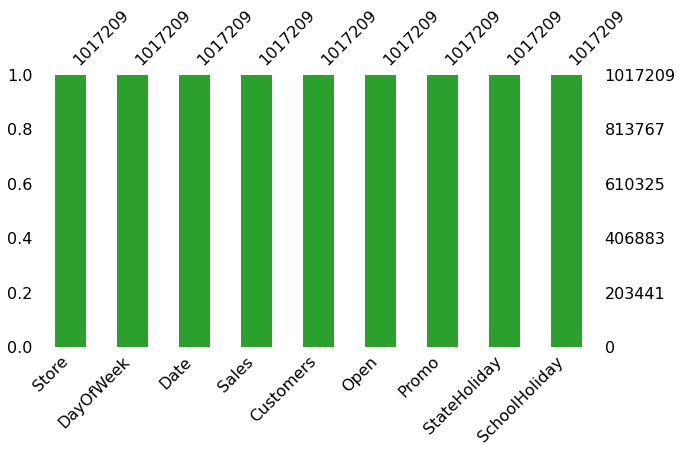

In [14]:
# Visualizing the missing values in Rossmann dataset
msno.bar(df_rossmann,figsize=(10,5), color="tab:green")

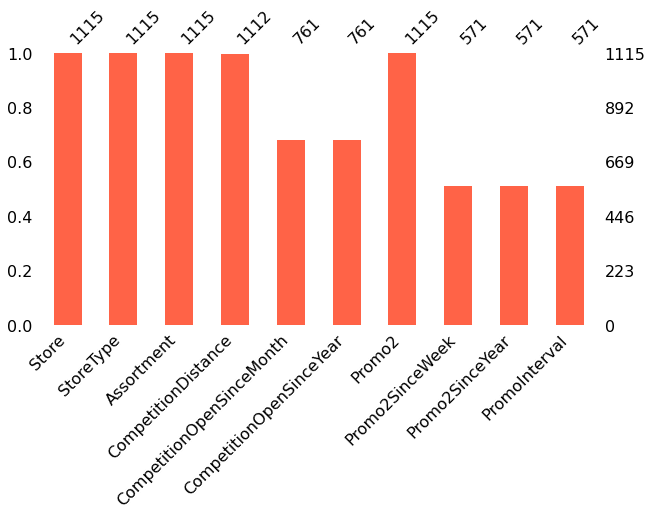

In [15]:
# Visualizing the missing values in Store dataset
msno.bar(df_store,figsize=(10,5),color="tomato")

### What did you know about your dataset?

Till now we get to know the following points about our dataset:

1.   Rossmann dataset does not contain any duplicated observations, null or numpy infinite values.
2.   Store dataset contains 50% null values in 3 of the features(Promo2SinceWeek, Promo2SinceYear, PromoInterval), 30% null values in 2 features (CompetitionSinceMonth, CompetitionSinceYear) and only 3 null values in (CompetitionDistance) feature.
3. Rossmann dataset contains 1017209 observations and Store dataset contains only 1115 observations which is not even 1% of Rossmann dataset so we have to be very careful while merging the datasets.




## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns
print(f"Column names of Rossmann dataset is:\n{df_rossmann.columns.tolist()}")
print(f"Column names of Store dataset is:\n{df_store.columns.tolist()}")

Column names of Rossmann dataset is:
['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
Column names of Store dataset is:
['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [17]:
#Rossmann Dataset Describe
df_rossmann.describe(include="all")

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [18]:
# Store dataset describe
df_store.describe(include="all")

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
for i in df_rossmann.columns.tolist():
  print("The Unique Values of', i, 'are:", df_rossmann[i].unique())

The Unique Values of', i, 'are: [   1    2    3 ... 1113 1114 1115]
The Unique Values of', i, 'are: [5 4 3 2 1 7 6]
The Unique Values of', i, 'are: ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29' '2015-0

In [20]:
# Check Unique Values for each variable.
for j in df_store.columns.tolist():
  print("The Unique Values of', j, 'are:", df_store[j].unique())

The Unique Values of', j, 'are: [   1    2    3 ... 1113 1114 1115]
The Unique Values of', j, 'are: ['c' 'a' 'd' 'b']
The Unique Values of', j, 'are: ['a' 'c' 'b']
The Unique Values of', j, 'are: [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.910e+03 2.370e+03 2.239e+04 2.710e+03
 1.181e+04 1.870e+03 4.

## 3. ***Data Wrangling***

####1. Null values treatment

 ##### a). Handling null values from **CompetitionDistance** feature.

In [21]:
# fetching the observations which contains null values in CompetitionDistance feature
df_store[df_store["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


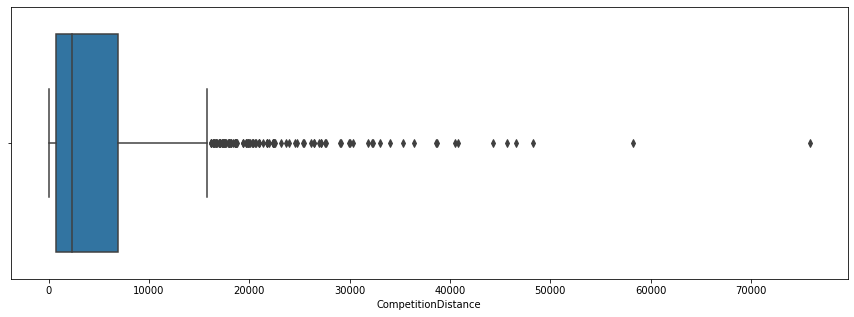

In [22]:
# plotting seaborn box plot to check the outliers in CompetitionDistance features
plt.figure(figsize=(15,5))
sns.boxplot(x= df_store["CompetitionDistance"])

Ummm... In order to fill the null values of CompetitionDistance we have 4 options:
1. Zero(0) >> Not effective as the corresponding CompetitionSinceMonth and CompetitionSinceYear should also have 0 and this is not possible.
2. Mean >> Replacing null values with mean will create blunders as it contains outliers and mean is influenced with outliers.
3. Median >> To get good results replacing with median can be a better choice.
4. Mode >> Mode can also help to fill the null values in our case

Since, we have two options(Mode and Median) we are going with the median.

In [23]:
# filling null values
df_store["CompetitionDistance"].fillna(df_store["CompetitionDistance"].median(), inplace=True)

In [24]:
# rechecking if we have any further null values in CompetitionDistance feature
df_store[df_store["CompetitionDistance"].isnull()].sum()

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

Hurray!!  We do not have any further null values in CompetitionDistance feature.

##### b). Handling null values from **CompetitionOpenSinceMonth and CompetitionOpenSinceYear** feature.

In [25]:
# fetching the observations which contains null values in CompetitionDistance and CompetitionOpenSinceYear feature
df_store[df_store["CompetitionOpenSinceMonth"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


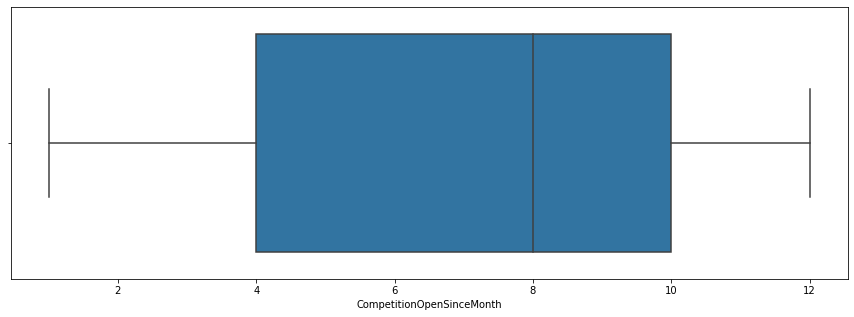

In [26]:
# plotting seaborn box plot to check the outliers in CompetitionDistance and CompetitionOpenSinceYear features
plt.figure(figsize=(15,5))
sns.boxplot(df_store["CompetitionOpenSinceMonth"])

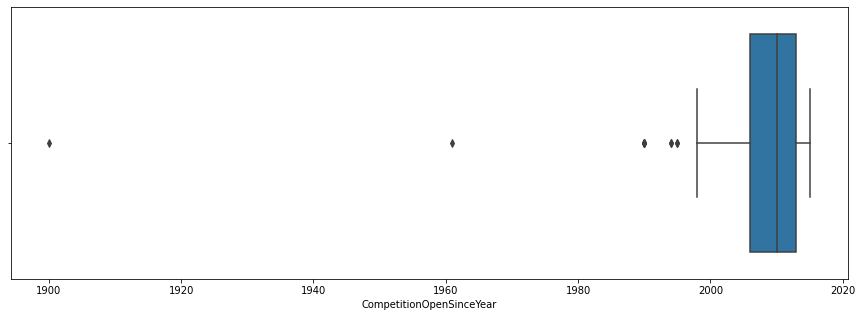

In [27]:
# plotting seaborn box plot to check the outliers in CompetitionDistance and CompetitionOpenSinceYear features
plt.figure(figsize=(15,5))
sns.boxplot(df_store["CompetitionOpenSinceYear"])

In [28]:
# filling null values of CompetitionOpenSinceMonth
df_store["CompetitionOpenSinceMonth"].fillna(df_store["CompetitionOpenSinceMonth"].mode()[0], inplace=True)

In [29]:
# filling null values of CompetitionOpenSinceYear
df_store["CompetitionOpenSinceYear"].fillna(df_store["CompetitionOpenSinceYear"].mode()[0], inplace=True)

In [30]:
# rechecking if we have any null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


##### c). Handling null values from **Promo2SinceWeek, Promo2SinceYear and PromoInterval** feature.

Since, Promo2SinceWeek, Promo2SinceYear and PromoInterval can not contains outliers as  Promo2SinceWeek and Promo2SinceYear having specified range and PromoInterval is the categorical feature. So replacing null values of Promo2SinceWeek, Promo2SinceYear and PromoInterval as 0 as the corrosponding store is not involve in promotion.

In [31]:
# Replacing all the null values of Promo2SinceWeek, Promo2SinceYear and PromoInterval with 0. 
df_store["Promo2SinceWeek"].fillna(0, inplace=True)
df_store["Promo2SinceYear"].fillna(0, inplace=True)
df_store["PromoInterval"].fillna(0, inplace=True)

In [32]:
# rechecking if our features contains more null values
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Congratulations we have achieved our first milestone by cleaning up all the null/missing values from both the datasets.

#### 2. Merging datasets

In [33]:
# checking shape of dataset using left join
df_left= pd.merge(df_rossmann, df_store, on="Store", how= "left")
print(df_left.shape)
print(f"Total number of null values obtained from left join: {df_left.isna().sum().sum()}")

# checking shape of dataset using right join
df_right= pd.merge(df_rossmann, df_store, on="Store", how= "right")
print(df_right.shape)
print(f"Total number of null values obtained from right join: {df_right.isna().sum().sum()}")


# checking shape of dataset using inner join
df_inner= pd.merge(df_rossmann, df_store, on="Store", how= "inner")
print(df_inner.shape)
print(f"Total number of null values obtained from inner join: {df_inner.isna().sum().sum()}")

# checking shape of dataset using outer join
df_outer= pd.merge(df_rossmann, df_store, on="Store", how= "outer")
print(df_outer.shape)
print(f"Total number of null values obtained from outer join: {df_outer.isna().sum().sum()}")

(1017209, 18)
Total number of null values obtained from left join: 0
(1017209, 18)
Total number of null values obtained from right join: 0
(1017209, 18)
Total number of null values obtained from inner join: 0
(1017209, 18)
Total number of null values obtained from outer join: 0


Since, we are obtaining the same shape and 0 null values from all the joins therefore we can use any of the join and it won't affact the results.

We are following the inner join for our further analysis.

In [34]:
#using inner join for our further analysis
df= pd.merge(df_rossmann, df_store, on="Store", how= "inner")
print(df.shape)

(1017209, 18)


In [35]:
# rechecking for the null values(if any) after merging
df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [36]:
#checking info of our final merged dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

#### 3. Typecasting

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [38]:
# changing dtype into required format from both the datasets
df["Date"]= pd.to_datetime(df["Date"],format="%Y/%m/%d")
df["CompetitionDistance"]= df["CompetitionDistance"].astype(int)
df["CompetitionOpenSinceMonth"]= df["CompetitionOpenSinceMonth"].astype(int)
df["CompetitionOpenSinceYear"]= df["CompetitionOpenSinceYear"].astype(int)
df["Promo2SinceWeek"]= df["Promo2SinceWeek"].astype(int)
df["Promo2SinceYear"]= df["Promo2SinceYear"].astype(int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

### What all manipulations have you done and insights you found?

In data wrangling we have divided it into three sections:


1.   **Null values treatment**: In this section we have treated all the null values from both the datasets. We did the following replacements:


> a. Replaced null values of CompetitionDistance with MEDIAN.

> b. Replaced null values of CompetitionOpenSinceMonth and with MODE.

> c. Replaced null values of CompetitionOpenSinceYear and with MODE.

> d. Replaced null values of Promo2SinceWeek and with 0. 

> e. Replaced null values of Promo2SinceYear and with 0.

> f. Replaced null values of PromoInterval and with 0.


2.   **Merging datasets**: We don't want to compromise with quality and quantity of our dataset in order to get the best accuracy in ML model implementation. So, we were wondering to use the best join for the good results and we got to know with our R&D that every join is giving the same shape of our merged dataset with 0 null values (Since the nunique(Number of unique counts are same) is same of merging feature("Store")). That's why we have decided to go with the inner join.

3.   **Typecasting**: In typecasting section we have typecasted the following features in order to visualize it properly and can feed them as input of ML model:


> a.

> b.

> c.

> d.











## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

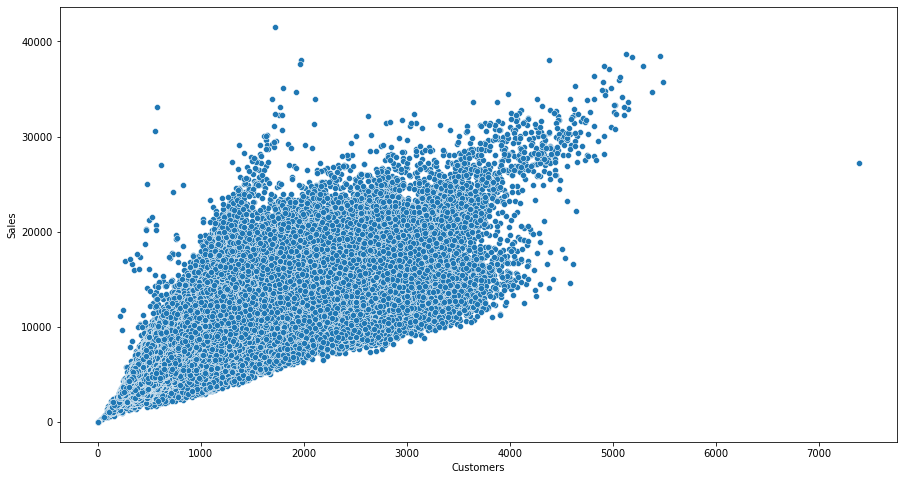

In [40]:
# Chart - 1 visualization code
plt.figure(figsize=(15,8))
sns.scatterplot(df["Customers"], df["Sales"], palette='colorblind')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

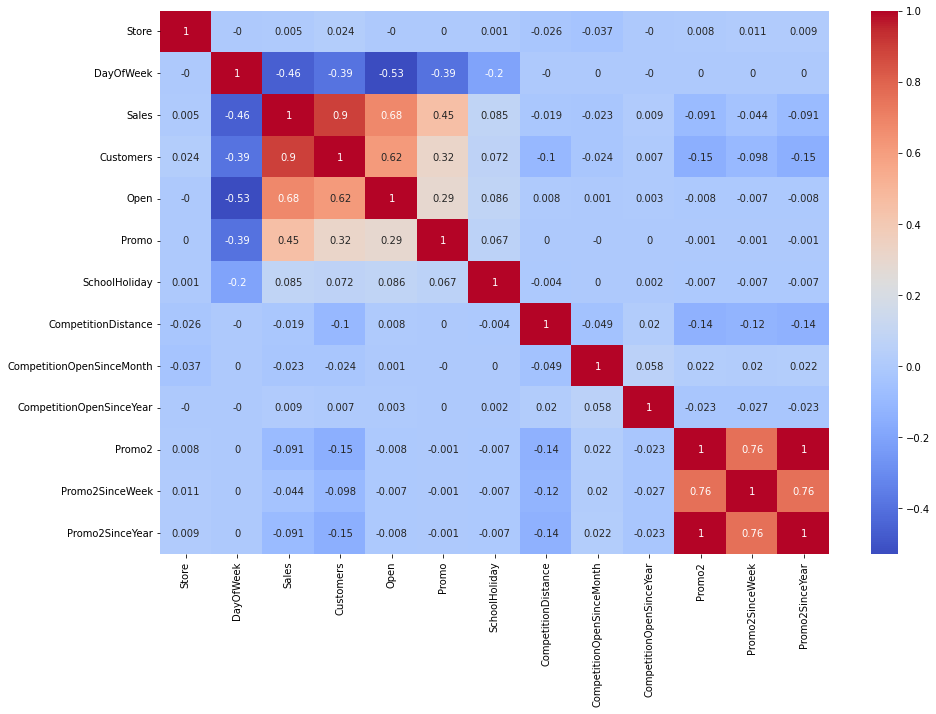

In [41]:
# Chart - 2 visualization code
plt.figure(figsize=(15,10))
sns.heatmap(round(df.corr(),3), annot=True, cmap="coolwarm")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

Text(0.5, 1.0, 'Sales vs Promotion (0-No Promotion, 1-Promotion)')

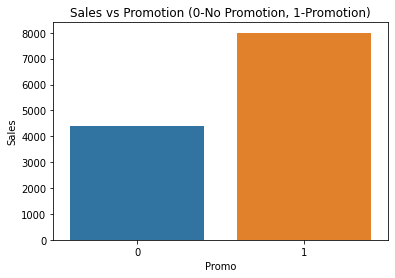

In [42]:
# Chart - 3 visualization code
ax= sns.barplot(x=df["Promo"], y=df["Sales"])
plt.title("Sales vs Promotion (0-No Promotion, 1-Promotion)")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

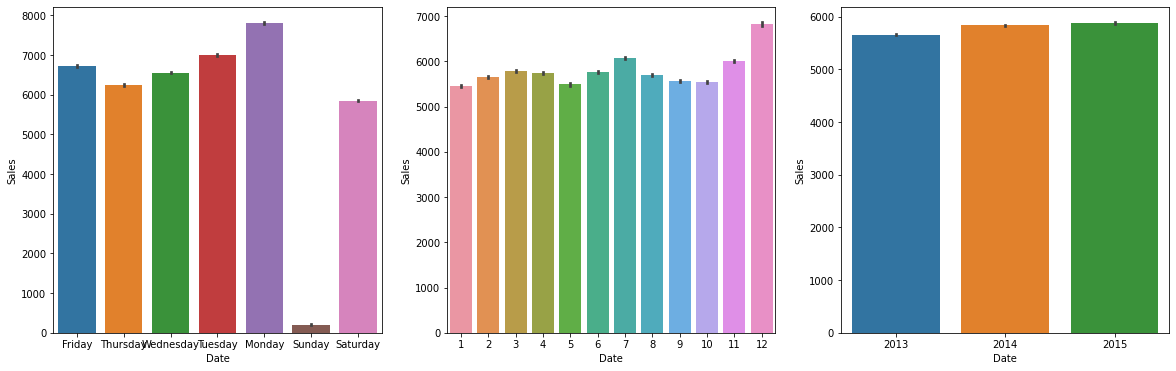

In [43]:
# Chart - 4 visualization code
plt.figure(figsize=(20,6))

#sales per date
plt.subplot(1,3,1)
sns.barplot(x=df["Date"].dt.day_name(), y=df["Sales"])

#sales per month
plt.subplot(1,3,2)
sns.barplot(x=df["Date"].dt.month, y=df["Sales"])

#sales per year
plt.subplot(1,3,3)
sns.barplot(x=df["Date"].dt.year, y=df["Sales"])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

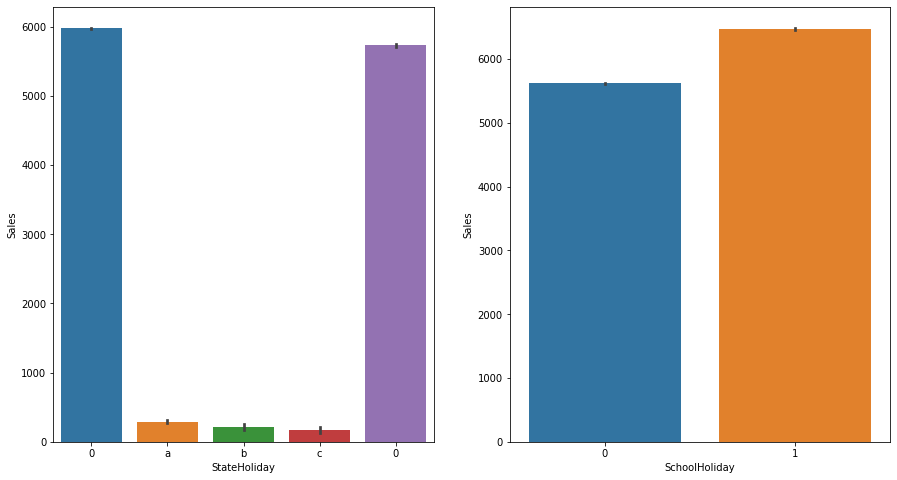

In [44]:
# Chart - 5 visualization code
# State Holiday vs Sales
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.barplot(df["StateHoliday"],df["Sales"])

# School Holiday vs Sales
plt.subplot(1,2,2)
sns.barplot(df["SchoolHoliday"],df["Sales"])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [45]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [46]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [47]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [48]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [49]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [50]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [51]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [52]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [53]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [54]:
# Pair Plot visualization code
# sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [55]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [56]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [57]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [58]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

We have replaced all the missing values in Data Wrangling section so we do not have any more missing/null/duplicad values in our dataset and our dataset is good to go.

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have checked the outliers and then replaced the null values of various columns with median and mode (clearly explained in the Data Wrangling section).

### 2. Handling Outliers

#### Univariate analysis of Outliers

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [60]:
# assigning continous variable features in new variables so that it makes sense while visulatizing through box plots
continous_value_feature= ["DayOfWeek", "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"]
numeric_features= ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear']
categorical_features= ["Date", "StoreType", "Assortment", "PromoInterval"]
print("Numeric_features: ",numeric_features)
print("Categorical_features: ",categorical_features)
print("Continous_value_feature: ",continous_value_feature)

Numeric_features:  ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']
Categorical_features:  ['Date', 'StoreType', 'Assortment', 'PromoInterval']
Continous_value_feature:  ['DayOfWeek', 'Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']


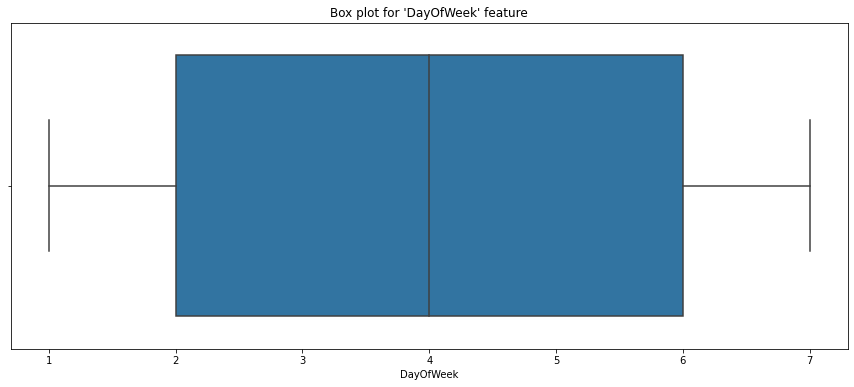

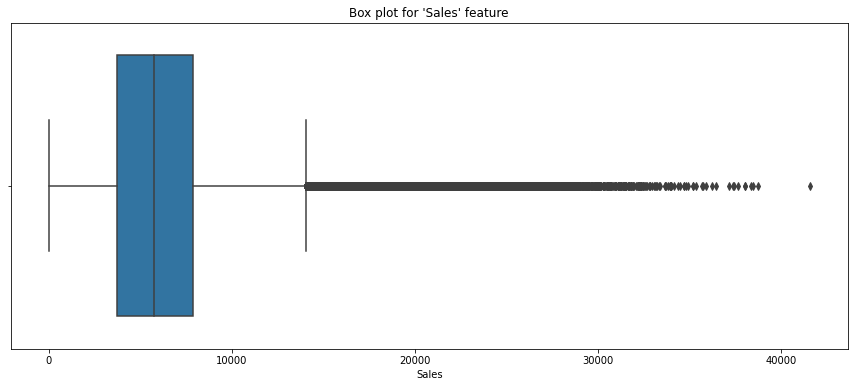

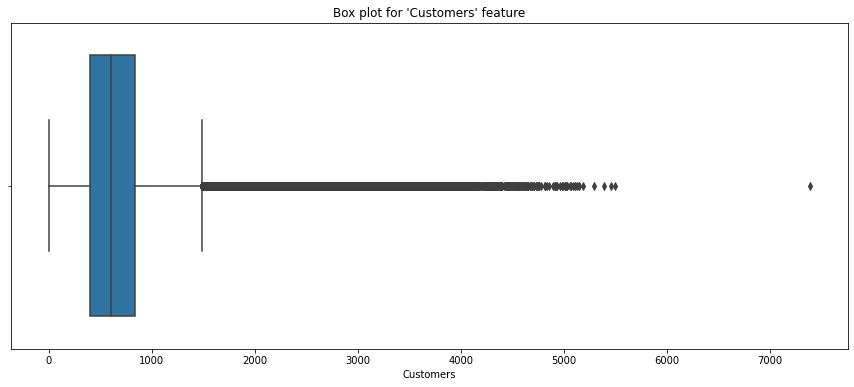

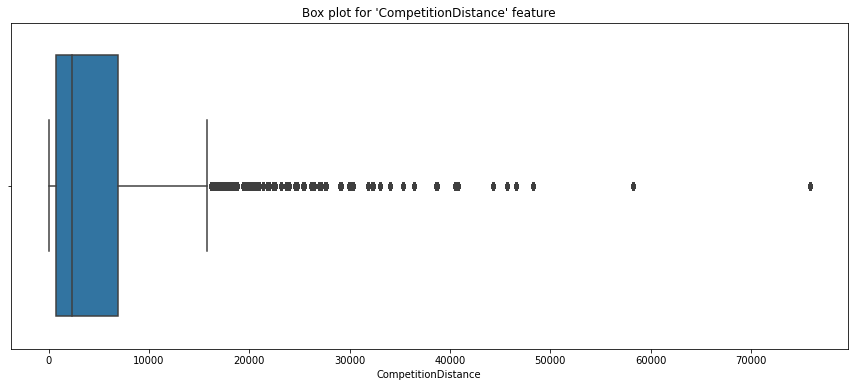

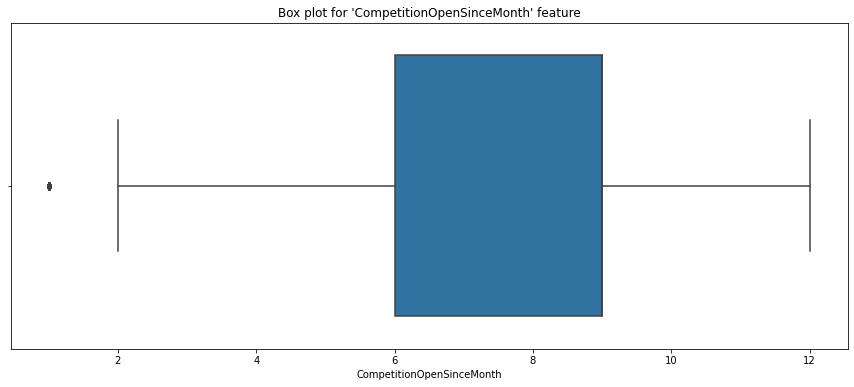

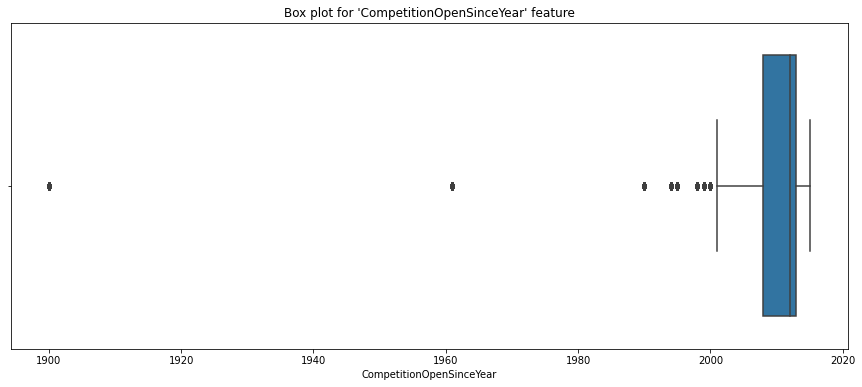

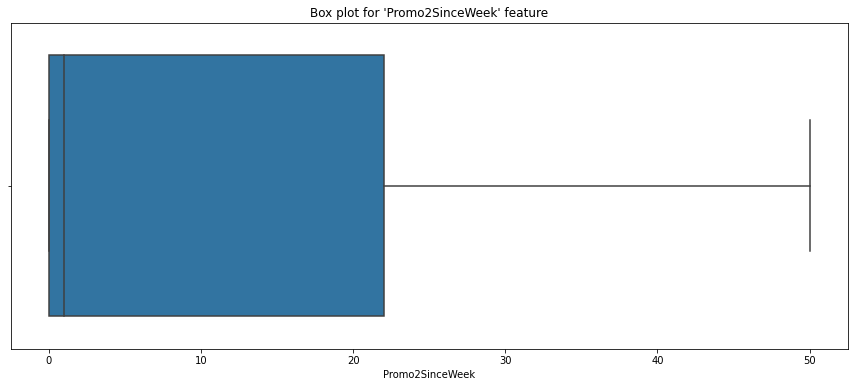

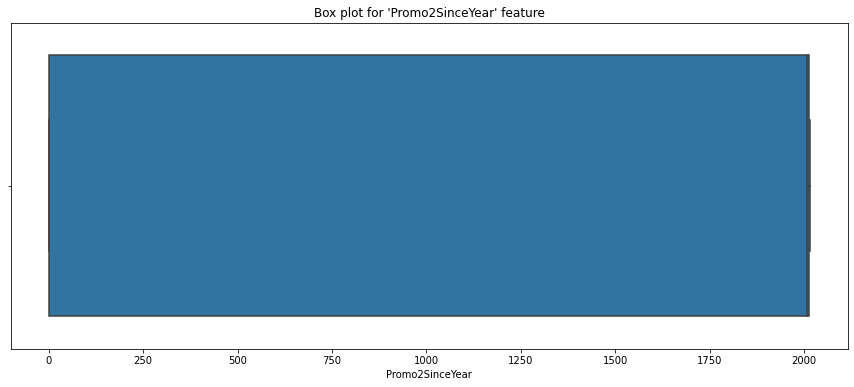

In [61]:
# Handling Outliers & Outlier treatments
for i in continous_value_feature:
  plt.figure(figsize=(15,6))
  sns.boxplot(df[i])
  plt.title(f"Box plot for '{i}' feature")
  plt.show()

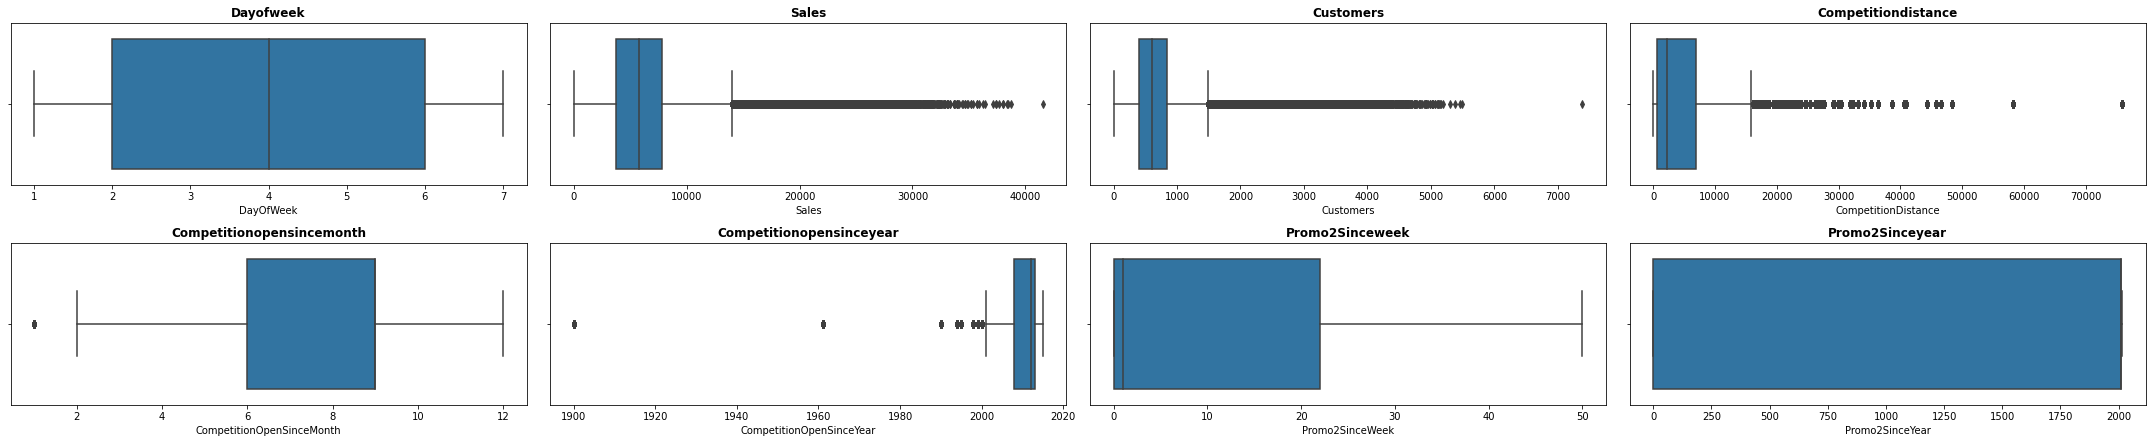

In [62]:
#all numeric
plt.figure(figsize=(30,15))
for n,column in enumerate(continous_value_feature):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

From the above box plots we can see clearly the features "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear" contains several outliers and rest of the features are fine as they are categorical in nature.

Let's define a code to detect the number of outliers and percentage of outliers present in each of the feature in order to handle them accordingly.

In [63]:
# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

In [64]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in continous_value_feature:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

DayOfWeek :
q1:2.0, q2:4.0, q3:6.0
Lower bound: -4.0, Upper bound: 12.0, IQR: 4.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Sales :
q1:3727.0, q2:5744.0, q3:7856.0
Lower bound: -2466.5, Upper bound: 14049.5, IQR: 4129.0
Total number of outliers are: 26694
Total percentage of outlier is: 2.62 %


Customers :
q1:405.0, q2:609.0, q3:837.0
Lower bound: -243.0, Upper bound: 1485.0, IQR: 432.0
Total number of outliers are: 38095
Total percentage of outlier is: 3.75 %


CompetitionDistance :
q1:710.0, q2:2325.0, q3:6880.0
Lower bound: -8545.0, Upper bound: 16135.0, IQR: 6170.0
Total number of outliers are: 99160
Total percentage of outlier is: 9.75 %


CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 12452
Total percentage of outlier is: 1.22 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 27

We have outliers and its percentage in the given features:

1. "Sales" - 2.62%
2. "Customers" - 3.75%
3. "CompetitionDistance" - 9.75%
4. "CompetitionOpenSinceMonth" - 1.22%
5. "CompetitionOpenSinceYear" - 2.71%

Let's define one more function for the outlier treatment using IQR technique and pass the above values to get those values in the IQR.

In [65]:
# Defining the function that treats outliers with the IQR technique
def treat_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]
    
    return treated_data_int

In [66]:
#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in continous_value_feature:
  df[feature]= treat_outliers_iqr(df[feature])

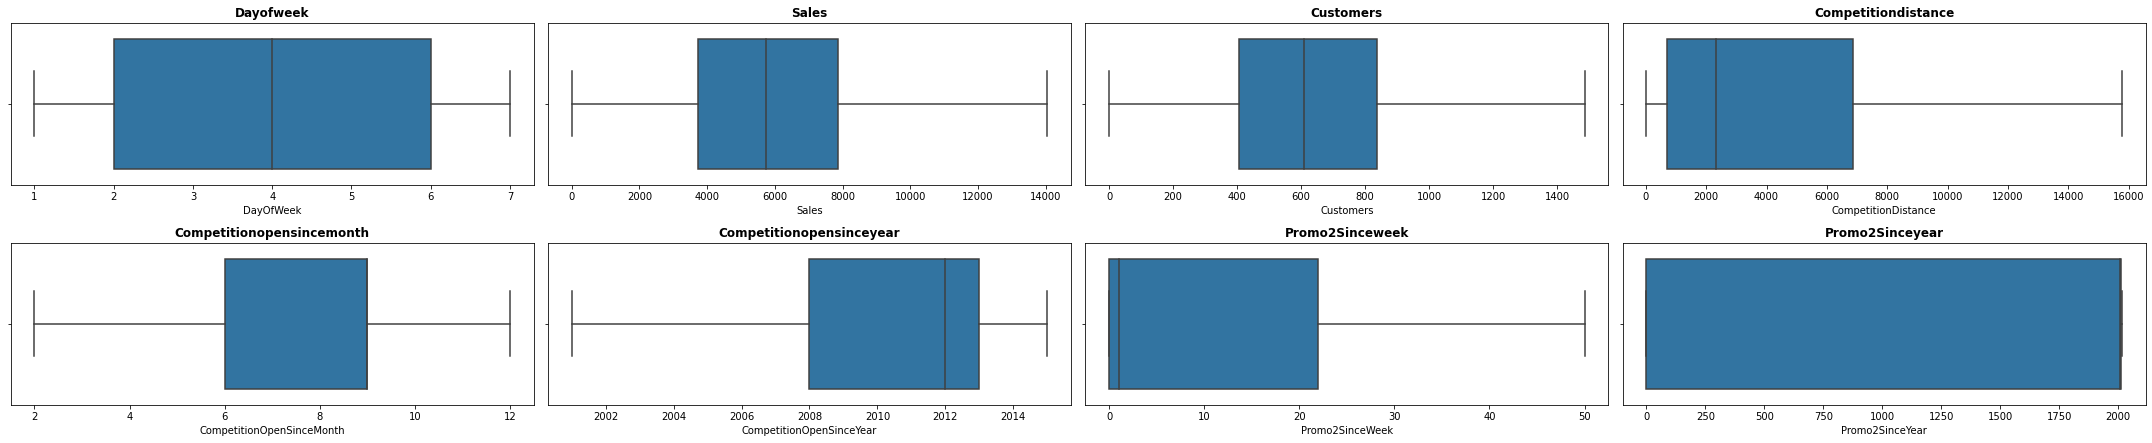

In [67]:
#Replotting the box plots and rechecking the percentage of outliers still available(if any) in the list of continous_value_feature.
plt.figure(figsize=(30,15))
for n,column in enumerate(continous_value_feature):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [68]:
# Rechecking the total number of outliers and its percentage present in our dataset.
for feature in continous_value_feature:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

DayOfWeek :
q1:2.0, q2:4.0, q3:6.0
Lower bound: -4.0, Upper bound: 12.0, IQR: 4.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Sales :
q1:3727.0, q2:5744.0, q3:7856.0
Lower bound: -2466.5, Upper bound: 14049.5, IQR: 4129.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Customers :
q1:405.0, q2:609.0, q3:837.0
Lower bound: -243.0, Upper bound: 1485.0, IQR: 432.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionDistance :
q1:710.0, q2:2325.0, q3:6880.0
Lower bound: -8545.0, Upper bound: 16135.0, IQR: 6170.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 0
Total percentage of 

#### Bivariate analysis of Outliers

In [69]:
# Storing object datatype column in the new list
obj_dtype= ["StateHoliday", "Assortment", "StoreType", "PromoInterval"]

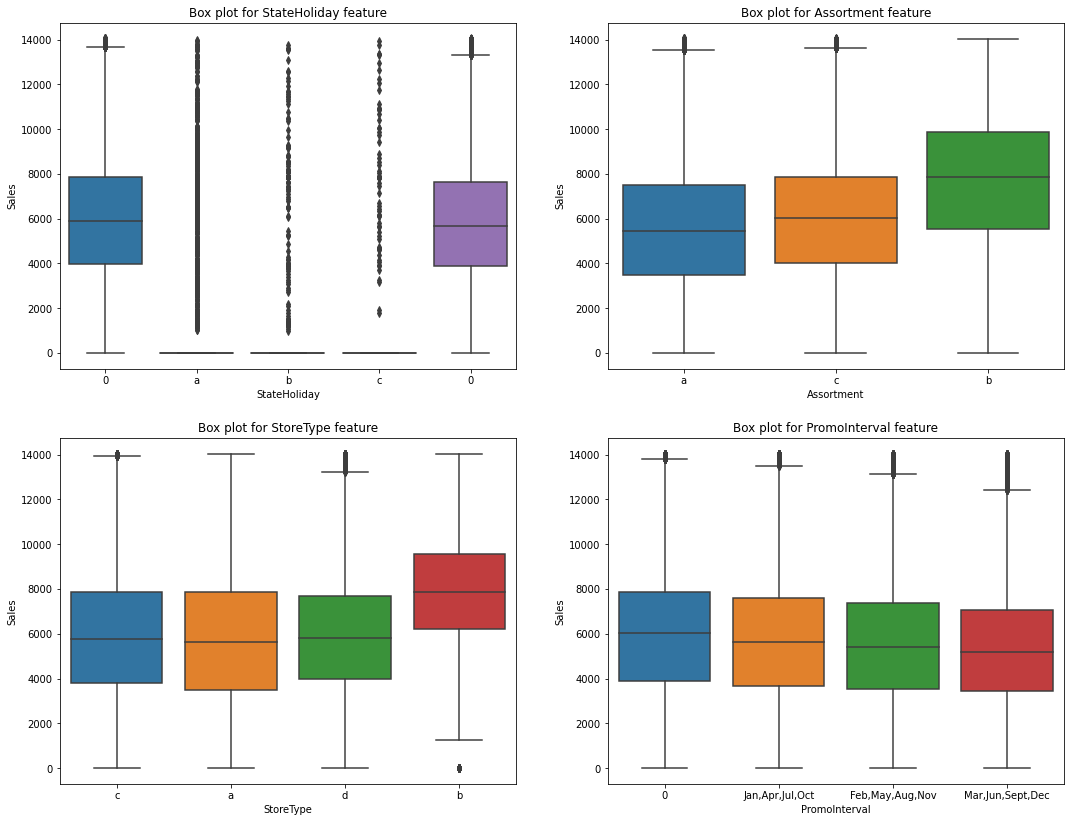

In [70]:
# Checking the outliers present in each category
plt.figure(figsize=(18,14))
for i,j in enumerate(obj_dtype):
  plt.subplot(2,2,i+1)
  sns.boxplot(x=df[j], y=df["Sales"])
  plt.title(f"Box plot for {j} feature")

In [71]:
obj_dtype

['StateHoliday', 'Assortment', 'StoreType', 'PromoInterval']

In [72]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the category of object dtype features
for feature in obj_dtype:
  print(f"Feature: {feature}")
  for num,cat in enumerate(df[feature].unique().tolist()):
    print(f"{num+1}: Category: {cat}")
    detect_outliers(df[df[feature]==cat]["Sales"])
    print("\n")

Feature: StateHoliday
1: Category: 0
q1:3982.0, q2:5878.0, q3:7856.0
Lower bound: -1829.0, Upper bound: 13667.0, IQR: 3874.0
Total number of outliers are: 3112
Total percentage of outlier is: 0.36 %


2: Category: a
q1:0.0, q2:0.0, q3:0.0
Lower bound: 0.0, Upper bound: 0.0, IQR: 0.0
Total number of outliers are: 694
Total percentage of outlier is: 3.43 %


3: Category: b
q1:0.0, q2:0.0, q3:0.0
Lower bound: 0.0, Upper bound: 0.0, IQR: 0.0
Total number of outliers are: 145
Total percentage of outlier is: 2.17 %


4: Category: c
q1:0.0, q2:0.0, q3:0.0
Lower bound: 0.0, Upper bound: 0.0, IQR: 0.0
Total number of outliers are: 71
Total percentage of outlier is: 1.73 %


5: Category: 0
q1:3874.0, q2:5674.0, q3:7650.25
Lower bound: -1790.375, Upper bound: 13314.625, IQR: 3776.25
Total number of outliers are: 773
Total percentage of outlier is: 0.59 %


Feature: Assortment
1: Category: a
q1:3492.0, q2:5463.0, q3:7514.0
Lower bound: -2541.0, Upper bound: 13547.0, IQR: 4022.0
Total number of out

In [73]:
# # Defining the function that treats outliers with the IQR technique
# def treat_outliers_iqr(data):
#     # Calculate the first and third quartiles
#     q1, q3 = np.percentile(data, [25, 75])
    
#     # Calculate the interquartile range (IQR)
#     iqr = q3 - q1
    
#     # Identify the outliers
#     lower_bound = q1 - (1.5 * iqr)
#     upper_bound = q3 + (1.5 * iqr)
#     outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
#     # Treat the outliers (e.g., replace with the nearest quartile value)
#     treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
#     treated_data_int = [int(absolute) for absolute in treated_data]
    
#     return treated_data_int

In [74]:
# obj_dtype

In [75]:
# #Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
# for feature in obj_dtype:
#   for num,cat in enumerate(df[feature].unique().tolist()):
#   df[feature]= treat_outliers_iqr(df[feature])

Hurray!!! We have successfully handled all the outliers without simply dropping them.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Since, the outliers present in some of the continous features i.e "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear" having the percentage 2.62%, 3.75% ,9.75%, 1.22%, 2.71% respectively.

We have defined the two seperate funtions one is for "outlier detection" and the other is for "outlier treatment using IQR" and passed all the observations of continous features through it. We have successfully shifted out extreme left outliers(<25%) and extreme outliers(>75%) in the 25th and 75th quartile value.

### 3. Categorical Encoding

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

Clearly we have "StoreType", "Assortment", "PromoInterval" as "object". To feed them as an input of our Machine Learnning algorithm, we need to use some encoding technique to make dtype of these column as "integer".

In [77]:
# creating the variable that contains list of "object" dtypes
obj= ["StateHoliday", "StoreType", "Assortment", "PromoInterval"]

In [78]:
# checking the unique counts of object dype column which is essential to determine the type of encoding to be use in various column
for unique in obj:
  print(f"{unique}: ")
  print(f"The unique values are: {df[unique].unique()}")
  print(f"Total number of unique values are: {df[unique].nunique()}")
  print("\n")

StateHoliday: 
The unique values are: ['0' 'a' 'b' 'c' 0]
Total number of unique values are: 5


StoreType: 
The unique values are: ['c' 'a' 'd' 'b']
Total number of unique values are: 4


Assortment: 
The unique values are: ['a' 'c' 'b']
Total number of unique values are: 3


PromoInterval: 
The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Total number of unique values are: 4




From the above output we can see that the feature "StateHoliday" contains "0" as string and 0 as int at various observations. we have to label them as 0 can club together as they both are resembling same information.

In [79]:
# replacing "0" to 0 and a=b=c=1 for our simplicity as they resembles that there is holiday
df["StateHoliday"].replace({"0":0, "a":1, "b":1, "c":1}, inplace=True)

In [80]:
# rechecking the unique counts of object dype column which is essential to determine the type of encoding to be use in various column
for unique in obj:
  print(f"{unique}: ")
  print(f"The unique values are: {df[unique].unique()}")
  print(f"Total number of unique values are: {df[unique].nunique()}")
  print("\n")

StateHoliday: 
The unique values are: [0 1]
Total number of unique values are: 2


StoreType: 
The unique values are: ['c' 'a' 'd' 'b']
Total number of unique values are: 4


Assortment: 
The unique values are: ['a' 'c' 'b']
Total number of unique values are: 3


PromoInterval: 
The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Total number of unique values are: 4




Great !!! Our data is ready for the ENCODING.

Since we have several encoding techniques but the major ones are:
1. Ordinal encoding: Used when the features are ordinal in nature and have some rank between them.
2. Nominal encoding: Used when the features have equal weightage and are nominal in nature.

As our all the categorical columns are nominal in nature(do not have any rank or order) so will use One-Hot Encoding (Type of Nominal encoding) in our senario:

In [81]:
#Lets create a copy of dataframe to avoid blunders with our original dataframe
df_new=df.copy() 

In [82]:
# Encode your categorical columns
## df_new= pd.get_dummies(df, dtype=int)

We can use the above code to create binary dummy variable for ONE-HOT ENCODING for each of the feature but we will face the issue of "multicollinearity" or "dummy variable trap" as the information given by the one feature can be explained by the other features and this results in the high "VIF". So it better to drop the redundant feature (one category among all other category) here only.

We can do this easily by passing the argument "drop_first = True" in get_dummies without doing it manually, thanks to python code development team to make our tasks easier.

In [83]:
# Encode your categorical columns by droppin the first category
df_new= pd.get_dummies(df, dtype=int, drop_first=True)

In [84]:
# code to see all the features
pd.set_option('display.max_columns', None)

In [85]:
# Let's see first five observations of our dataset
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0


In [86]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  int64         
 4   Customers                       1017209 non-null  int64         
 5   Open                            1017209 non-null  int64         
 6   Promo                           1017209 non-null  int64         
 7   StateHoliday                    1017209 non-null  int64         
 8   SchoolHoliday                   1017209 non-null  int64         
 9   CompetitionDistance             1017209 non-null  int64         
 10  CompetitionOpenSinceMonth       1017209 no

#### What all categorical encoding techniques have you used & why did you use those techniques?

a. We have used one-hot encoding technique to change our categorical features of object type into int type by creating their dummies so that it becomes compatible to feed it into various ML algorithms in future.

b. Since, we have 3 to 4 unique orderless categories in all the categorical features (which is less in number). So, it is good to use Nominal encoding technique then ordinal.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [87]:
# Expand Contraction

#### 2. Lower Casing

In [88]:
# Lower Casing

#### 3. Removing Punctuations

In [89]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [90]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [91]:
# Remove Stopwords

In [92]:
# Remove White spaces

#### 6. Rephrase Text

In [93]:
# Rephrase Text

#### 7. Tokenization

In [94]:
# Tokenization

#### 8. Text Normalization

In [95]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [96]:
# POS Taging

#### 10. Text Vectorization

In [97]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [98]:
# Manipulate Features to minimize feature correlation and create new 
# Checking the first fir=ve observation of the dataset we have to deal with.
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0


In [99]:
# # Extracting date, month and year from Date feature
# df_new["Day"]= df_new["Date"].apply(lambda x: df_new["Date"].dt.day)
# df_new["Month"]= df_new["Date"].apply(lambda x: df_new["Date"].dt.month)
# df_new["Year"]= df_new["Date"].apply(lambda x: df_new["Date"].dt.year)

# #Dropping Date feature from the dataset as we are gaining same information with extracted features
# df_new.drop(columns=["Date"],inplace=True, axis=1)

In [100]:
# Extracting date, month and year from Date feature
df_new["Day"]= df_new["Date"].dt.day
df_new["Month"]= df_new["Date"].dt.month
df_new["Year"]= df_new["Date"].dt.year
df_new["Week"]= df_new["Date"].dt.week

In [101]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Day,Month,Year,Week
0,1,5,2015-07-31,5263,555,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,31,7,2015,31
1,1,4,2015-07-30,5020,546,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,30,7,2015,31
2,1,3,2015-07-29,4782,523,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,29,7,2015,31
3,1,2,2015-07-28,5011,560,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,28,7,2015,31
4,1,1,2015-07-27,6102,612,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,27,7,2015,31


In [102]:
# deriving 2 new features:
# 1. "CompetitionDuration -> Duration from which two stores are competiting"
# 2. "PromoDuration -> Duration from which the store is not involved in any promotion"
##    Final values are in Months.
df_new["CompetitionDuration"]= (df_new["Year"]-df_new["CompetitionOpenSinceYear"])*12 + (df_new["Month"]-df_new["CompetitionOpenSinceMonth"])
df_new["CompetitionDuration"] = df_new["CompetitionDuration"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0)

# Creating PromoDuration feature
df_new["PromoDuration"]= (df_new["Year"]-df_new["Promo2SinceYear"])*12 + (df_new["Week"]-df_new["Promo2SinceWeek"])*7/30.5
df_new["PromoDuration"] = df_new["PromoDuration"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0) * df["Promo2"]

In [103]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Day,Month,Year,Week,CompetitionDuration,PromoDuration
0,1,5,2015-07-31,5263,555,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,31,7,2015,31,82,0
1,1,4,2015-07-30,5020,546,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,30,7,2015,31,82,0
2,1,3,2015-07-29,4782,523,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,29,7,2015,31,82,0
3,1,2,2015-07-28,5011,560,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,28,7,2015,31,82,0
4,1,1,2015-07-27,6102,612,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,27,7,2015,31,82,0


#### 2. Feature Selection

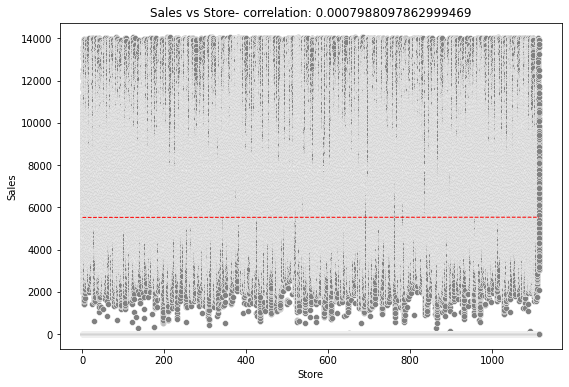

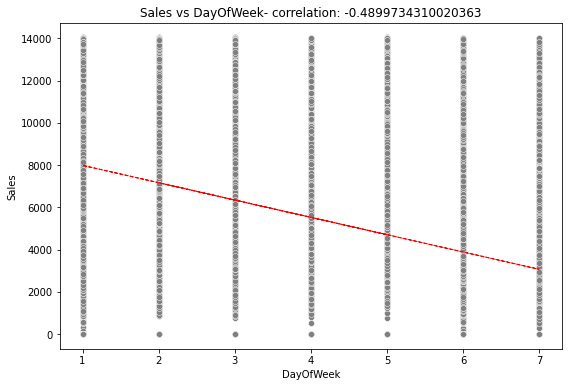

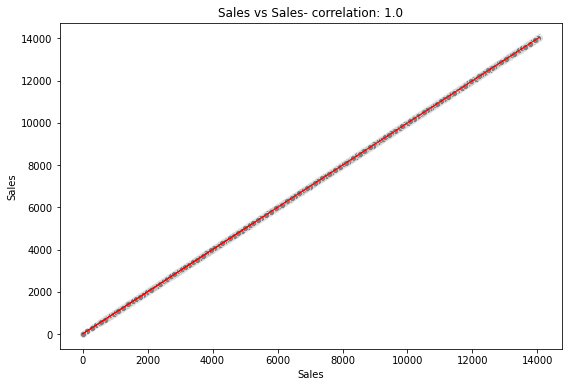

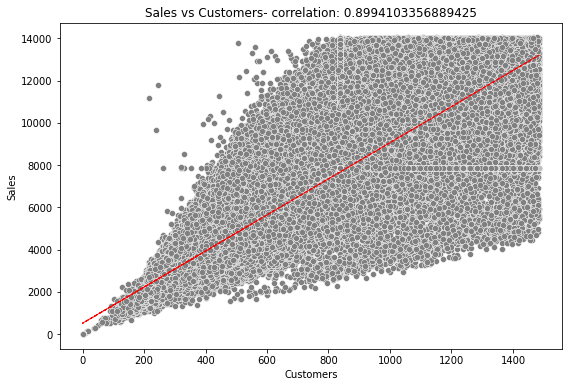

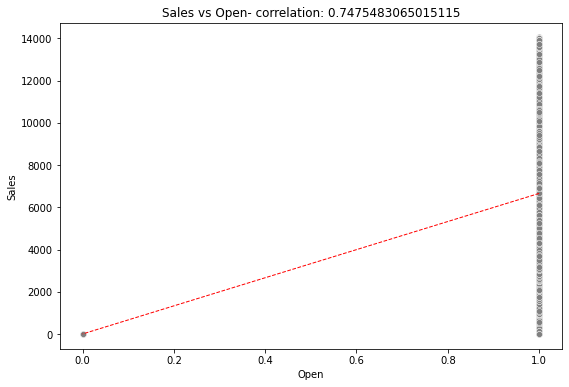

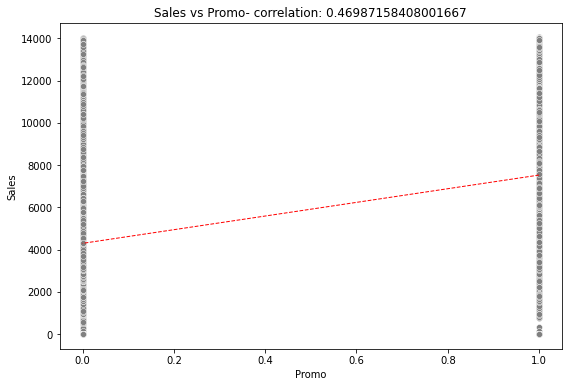

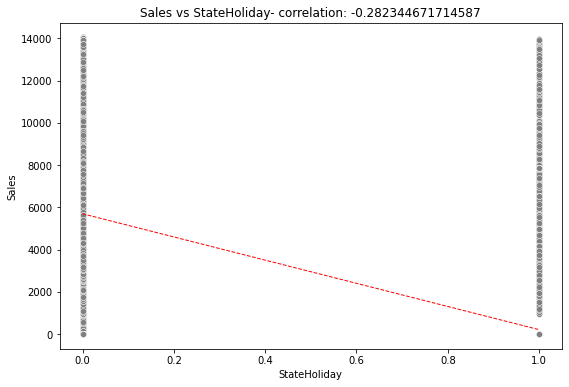

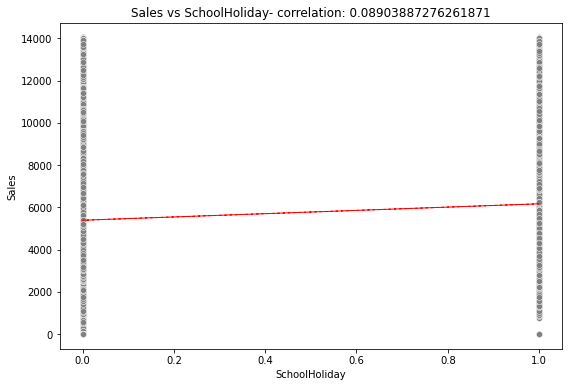

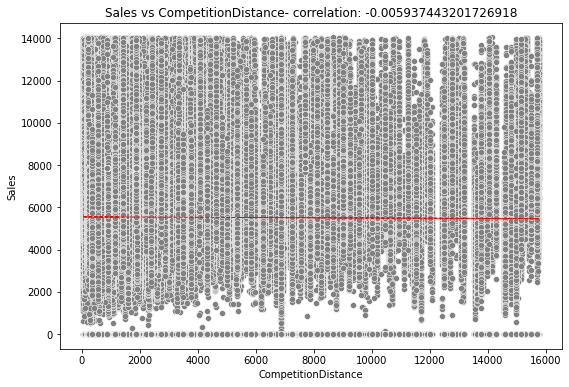

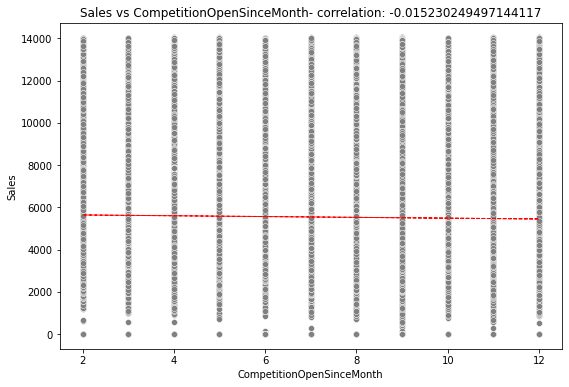

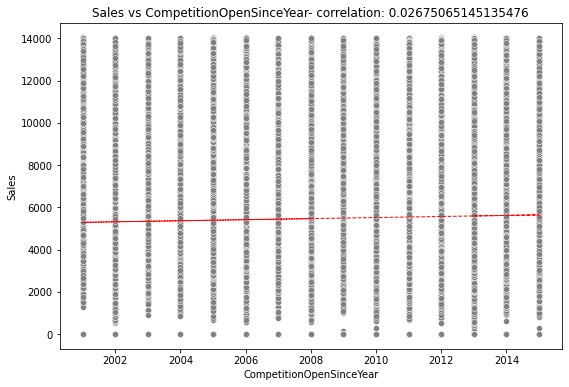

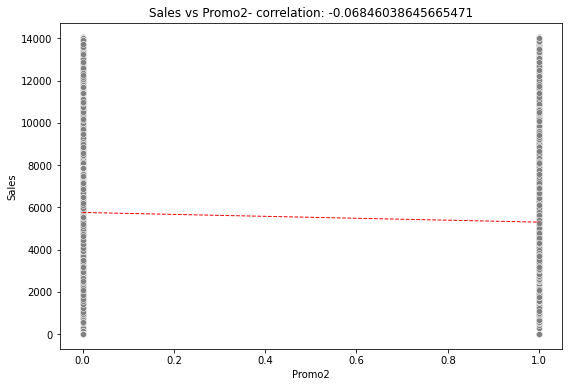

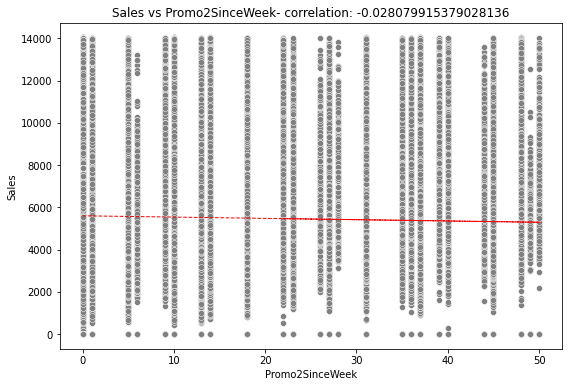

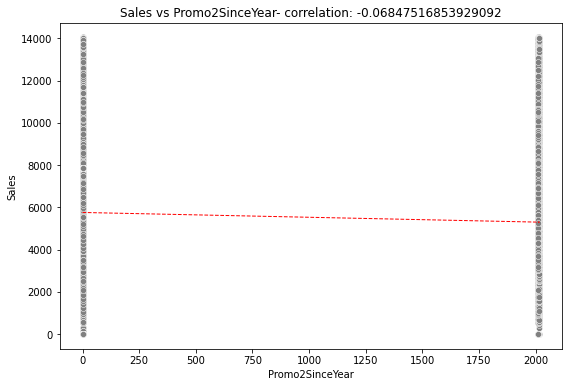

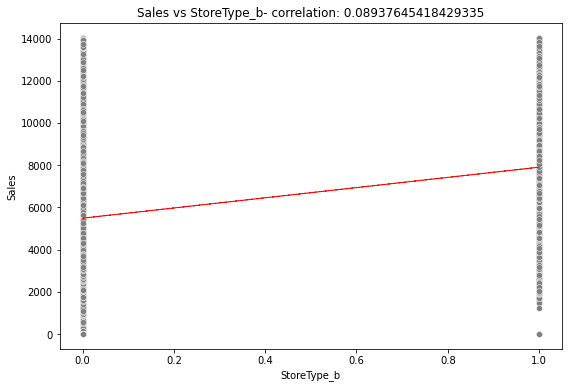

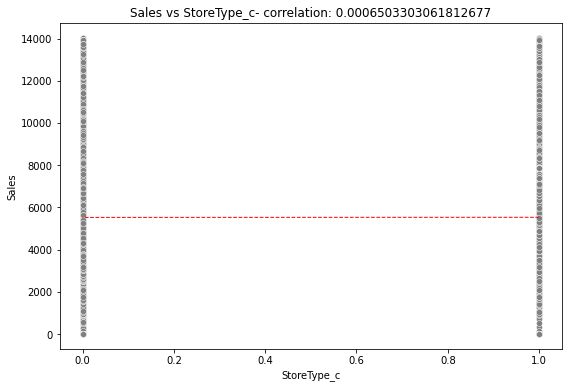

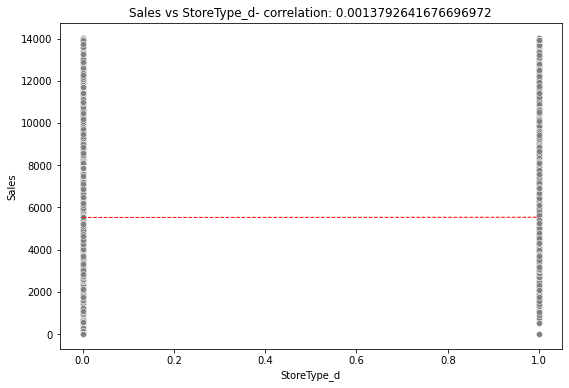

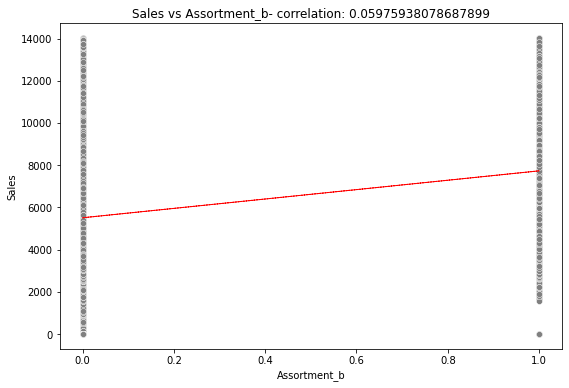

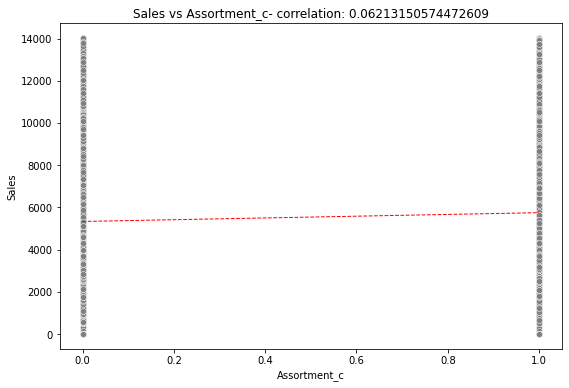

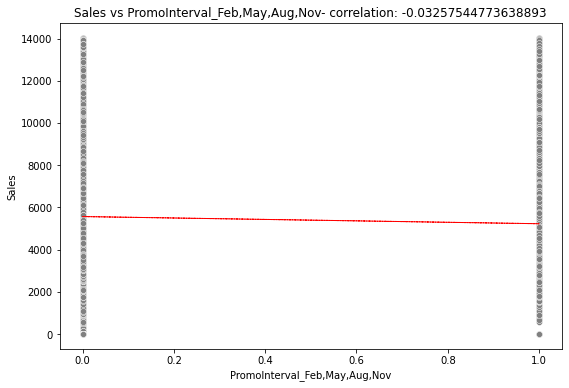

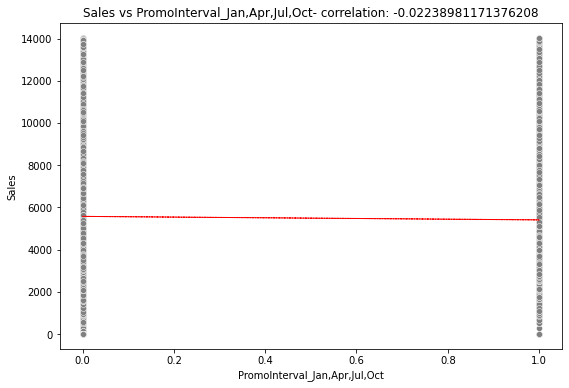

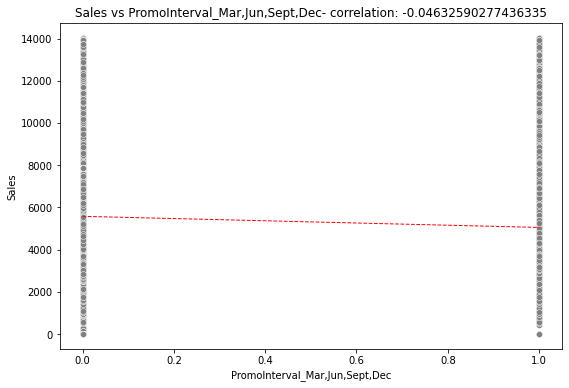

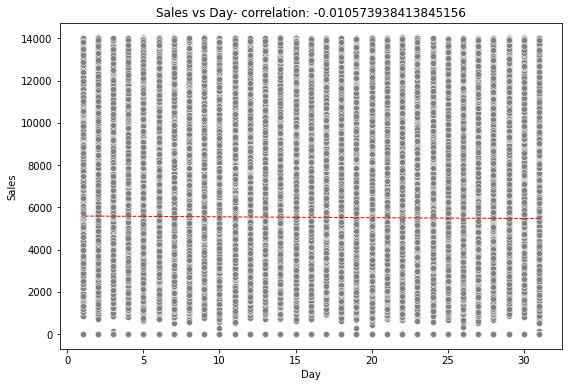

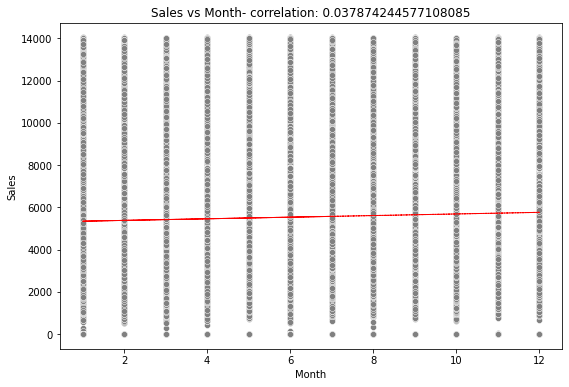

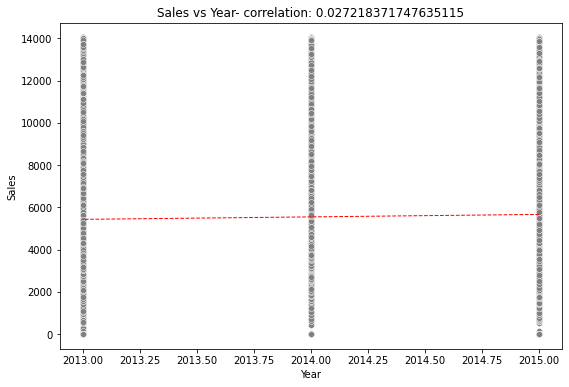

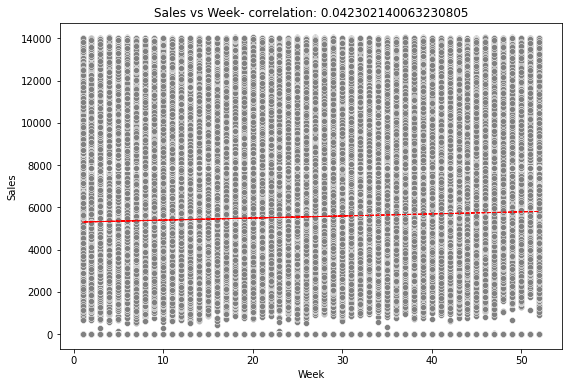

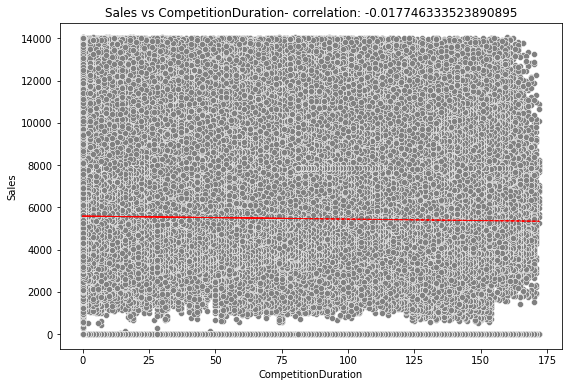

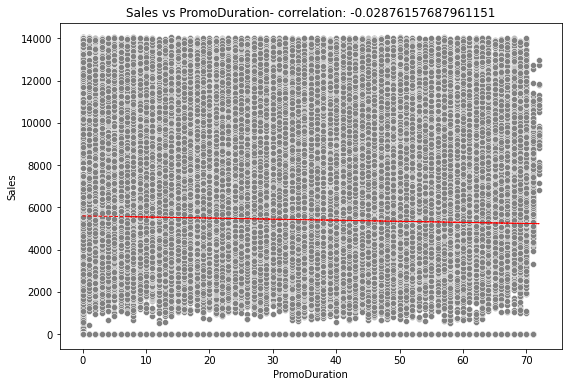

In [104]:
# Let's see how sales and other features are related
for col in df_new.describe().columns.tolist():
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_new[col]
    label = df_new['Sales']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label, color="gray")
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df_new[col], df_new['Sales'], 1)
    y_hat = np.poly1d(z)(df_new[col])
    plt.plot(df_new[col], y_hat, "r--", lw=1)
    plt.show()

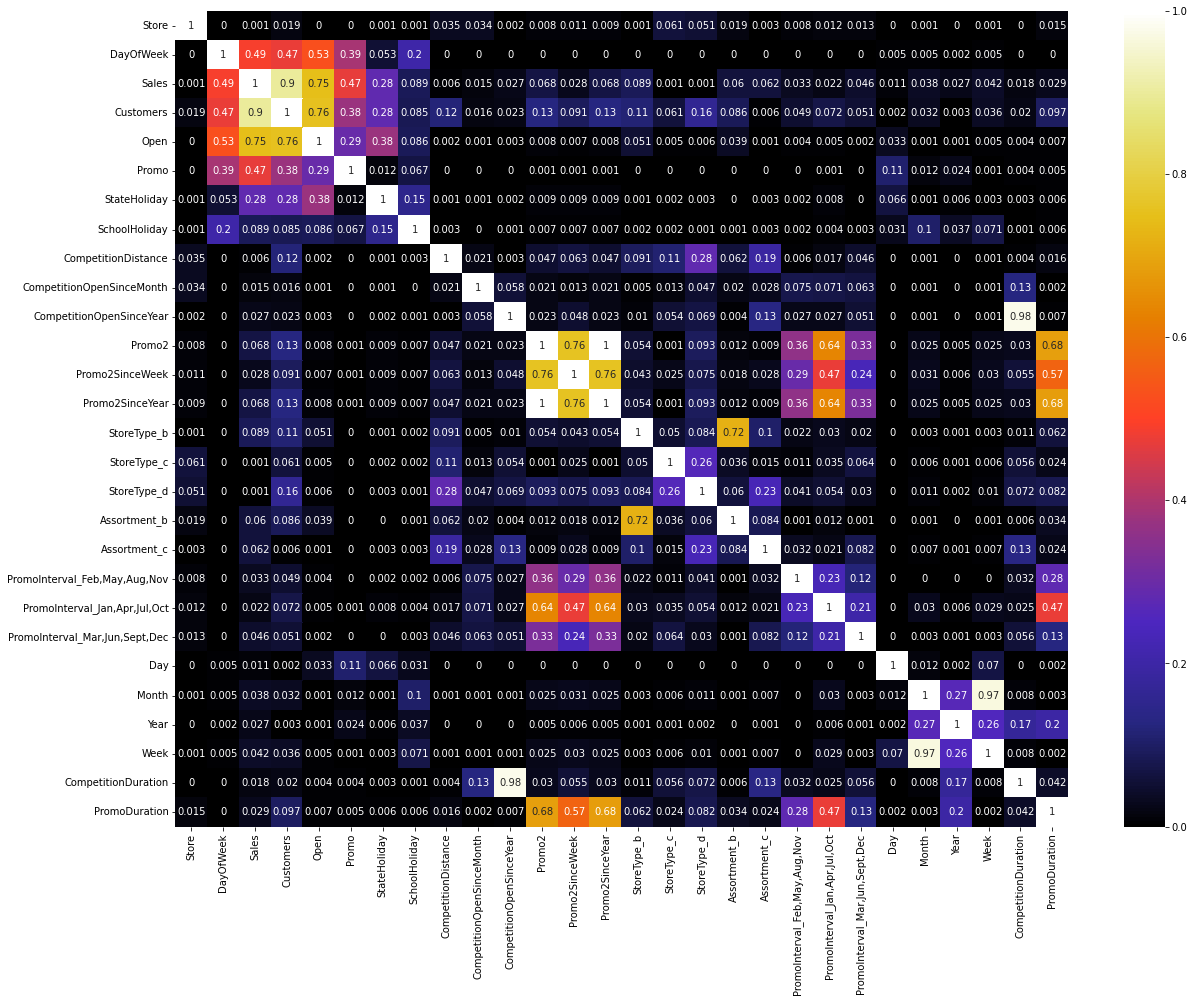

In [105]:
# Select your features wisely to avoid overfitting
plt.figure(figsize=(20,15))
sns.heatmap(abs(round(df_new.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

In [106]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

Calculating VIF(Variance Inflation Factor) by excluding:
1. "Sales" -> As it is target variable
2. "Store" -> As it is StoreID and not giving any information

In [107]:
# calculating the vif by excluding the redundant features("Sales -> Dependent variable" and "Store -> ID")
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales"]]])

,variables,VIF
0,DayOfWeek,8.619136e+00
1,Customers,1.085175e+01
2,Open,1.799490e+01
3,Promo,2.091034e+00
4,StateHoliday,1.385911e+00
5,SchoolHoliday,1.339675e+00
6,CompetitionDistance,2.332660e+00
7,CompetitionOpenSinceMonth,1.678791e+01
8,CompetitionOpenSinceYear,4.617627e+07
9,Promo2,inf


We have extracted the information of "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Day", "Month", "Year", "Week" from our derived features "CompetitionDuration" and "PromoDuration" and have 0 correlation from "Sales". So we can exclude them too.


In [108]:
# Calculating VIF by excluding some more features
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]]])

,variables,VIF
0,DayOfWeek,8.618825
1,Customers,10.831443
2,Open,17.979372
3,Promo,2.090856
4,StateHoliday,1.385842
5,SchoolHoliday,1.339605
6,CompetitionDistance,2.324470
7,Promo2,inf
8,StoreType_b,2.160331
9,StoreType_c,1.273913


Let's exclude "PromoInterval_Jan,Apr,Jul,Oct" as well. As we are getting the exact information from the "Promo2", "PromoInterval_Feb,May,Aug,Nov", "PromoInterval_Mar,Jun,Sept,Dec" features and "PromoInterval_Jan,Apr,Jul,Oct" is having less corelation with "Sales"

In [109]:
# Calculating VIF by excluding some more features
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "PromoInterval_Jan,Apr,Jul,Oct"]]])

,variables,VIF
0,DayOfWeek,8.618825
1,Customers,10.831443
2,Open,17.979372
3,Promo,2.090856
4,StateHoliday,1.385842
5,SchoolHoliday,1.339605
6,CompetitionDistance,2.324470
7,Promo2,4.814013
8,StoreType_b,2.160331
9,StoreType_c,1.273913


Among "Month", "Week" features, we can exclude "Month" since it is having least corelation (=0.038) from "Sales". 

In [ ]:
# Calculating VIF by excluding some more features
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "PromoInterval_Jan,Apr,Jul,Oct", "Month"]]])

Since, "Year" has high VIF and very less corelation with our target variable(Sales). Let's exclude this too.

In [111]:
# Calculating VIF by excluding some more features
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "PromoInterval_Jan,Apr,Jul,Oct", "Month", "Year"]]])

,variables,VIF
0,DayOfWeek,3.821336
1,Customers,10.653775
2,Open,14.187099
3,Promo,1.996845
4,StateHoliday,1.171539
5,SchoolHoliday,1.300504
6,CompetitionDistance,2.271780
7,Promo2,4.708021
8,StoreType_b,2.160064
9,StoreType_c,1.265328


"Customers" and "Open" has high corelation with each other(0.75) and it is very true when the store opens then only customer can visit the store. Since, "Open" contain less corelation with ("Sales -> Dependent variable") then "Customers. We can exclude "Open" as well.

In [112]:
# Calculating VIF by excluding some more features
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "PromoInterval_Jan,Apr,Jul,Oct", "Month", "Year", "Open"]]])

,variables,VIF
0,DayOfWeek,3.820604
1,Customers,4.131491
2,Promo,1.994820
3,StateHoliday,1.129798
4,SchoolHoliday,1.293326
5,CompetitionDistance,2.197329
6,Promo2,4.598489
7,StoreType_b,2.160062
8,StoreType_c,1.265230
9,StoreType_d,1.770592


In [113]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 29 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  int64         
 4   Customers                       1017209 non-null  int64         
 5   Open                            1017209 non-null  int64         
 6   Promo                           1017209 non-null  int64         
 7   StateHoliday                    1017209 non-null  int64         
 8   SchoolHoliday                   1017209 non-null  int64         
 9   CompetitionDistance             1017209 non-null  int64         
 10  CompetitionOpenSinceMonth       1017209 no

Great !!! We are getting very good VIF's (Less then 5). Now let's move forward and store the extremely important features in a new dataframe.

In [114]:
# New Dataframe which will be our final dataframe
final_df = df_new[["DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_b","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","Week","CompetitionDuration","PromoDuration", "Sales"]]

In [115]:
# Checking our final dataframe
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                          Non-Null Count    Dtype
---  ------                          --------------    -----
 0   DayOfWeek                       1017209 non-null  int64
 1   Customers                       1017209 non-null  int64
 2   Promo                           1017209 non-null  int64
 3   StateHoliday                    1017209 non-null  int64
 4   SchoolHoliday                   1017209 non-null  int64
 5   CompetitionDistance             1017209 non-null  int64
 6   Promo2                          1017209 non-null  int64
 7   StoreType_b                     1017209 non-null  int64
 8   StoreType_c                     1017209 non-null  int64
 9   StoreType_d                     1017209 non-null  int64
 10  Assortment_b                    1017209 non-null  int64
 11  Assortment_c                    1017209 non-null  int64
 12  PromoInterval_Feb,May,Aug,No

##### What all feature selection methods have you used  and why?

We have ploted the seaborn's scatterplot and seaborn's heatmap to see the relationship of each of the feature with target variable and observed the following corelations:
1. **Positive Corelation**- Sales, Customers, Ope, Promo, SchoolHoliday, CompetitionOpenSinceYear, Assortment_b, Assortment_c, Month, Year, Week, PromoDuration.
2. **Negative Corelation**- DayOfWeek, StateHoliday, ComptitionDistance, CompetitionOpenSinceMonth, Promo2, Promo2SinceWeek,Promo2SinceYear, 'PromoInterval_Feb,May,Aug,Nov, 'PromoInterval_Jan,Apr,Jul,Oct, PromoInterval_Mar,Jun,Sept,Dec, Day, CompetitionDuration.
3. **No Corelation**- Store, StoreType_c, StoreType_d



1. Defined the function for calculating the VIF.
2. 

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [116]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                          Non-Null Count    Dtype
---  ------                          --------------    -----
 0   DayOfWeek                       1017209 non-null  int64
 1   Customers                       1017209 non-null  int64
 2   Promo                           1017209 non-null  int64
 3   StateHoliday                    1017209 non-null  int64
 4   SchoolHoliday                   1017209 non-null  int64
 5   CompetitionDistance             1017209 non-null  int64
 6   Promo2                          1017209 non-null  int64
 7   StoreType_b                     1017209 non-null  int64
 8   StoreType_c                     1017209 non-null  int64
 9   StoreType_d                     1017209 non-null  int64
 10  Assortment_b                    1017209 non-null  int64
 11  Assortment_c                    1017209 non-null  int64
 12  PromoInterval_Feb,May,Aug,No

Before Applying Transformation


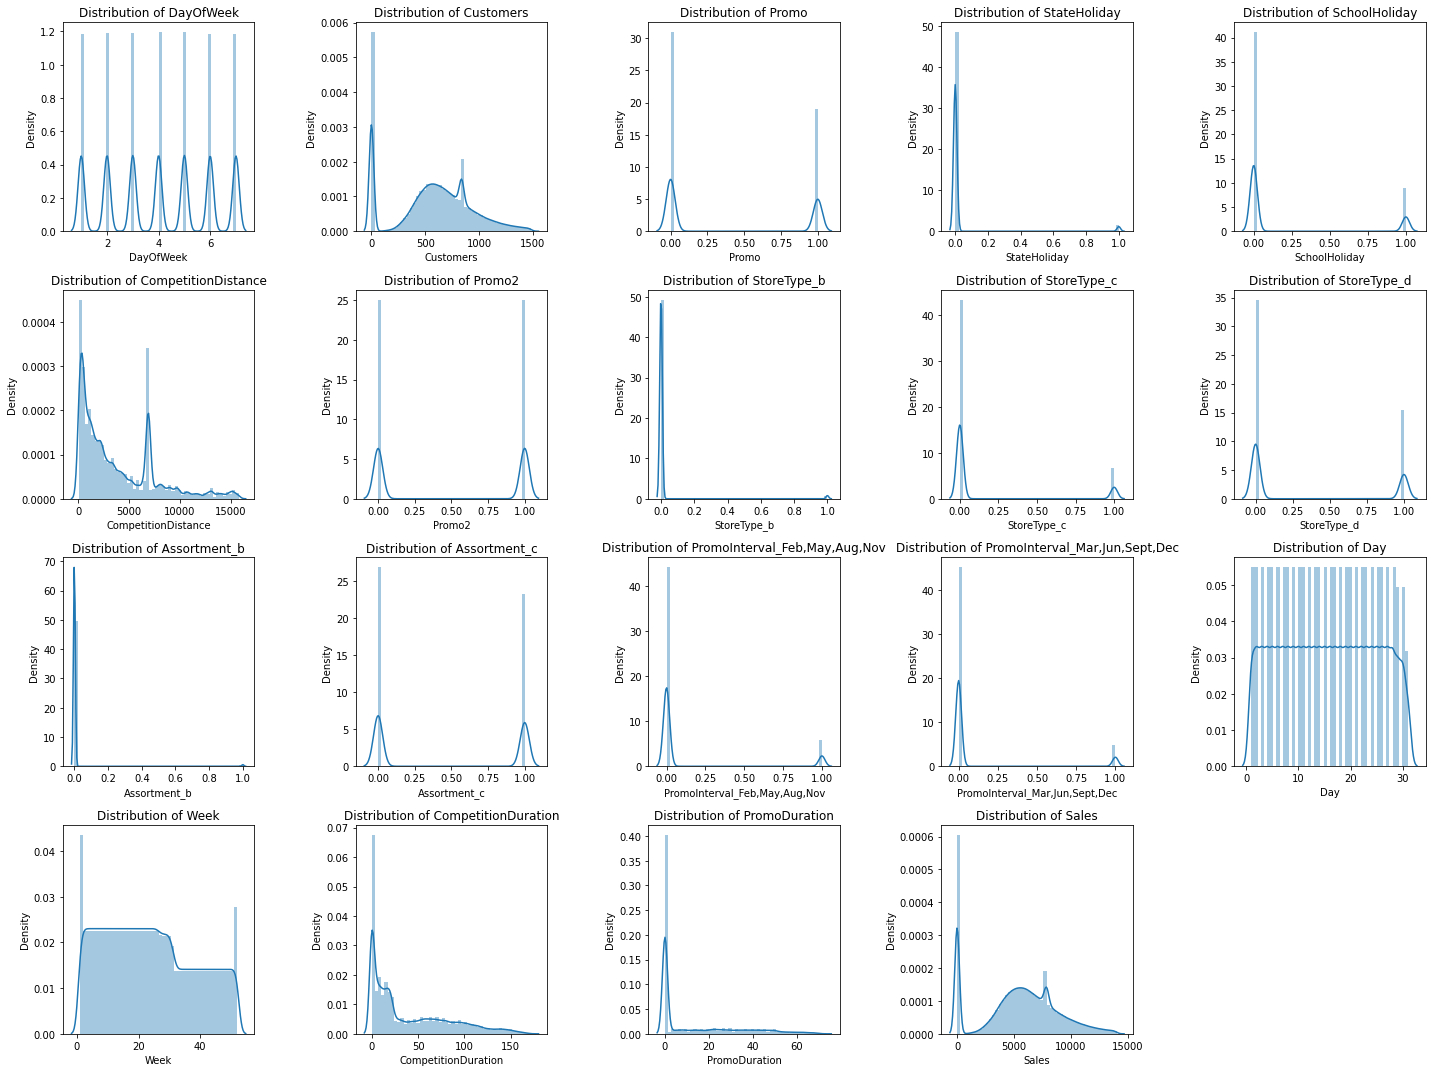

In [117]:
# Checking the distribution of each variable of our final dataframe
plt.figure(figsize=(20,15))
print("Before Applying Transformation")
for n,col in enumerate(final_df.columns):
  plt.subplot(4,5,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

In [118]:
# Storing the continous variables in a separate list and treating them to make gaussian distribution
cont_variables= ["Sales", "Customers", "CompetitionDistance", "PromoDuration", "CompetitionDuration"]

Before Applying Transformation


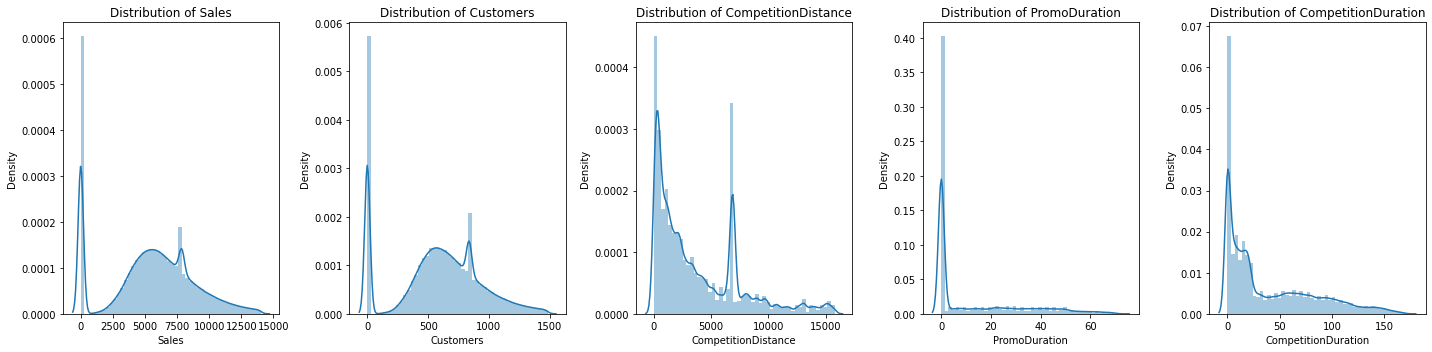

In [119]:
# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("Before Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

In [150]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    stat.probplot(df[feature],dist='norm',plot=pylab)

Q-Q Plot for variable: Sales
Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: PromoDuration
Q-Q Plot for variable: CompetitionDuration


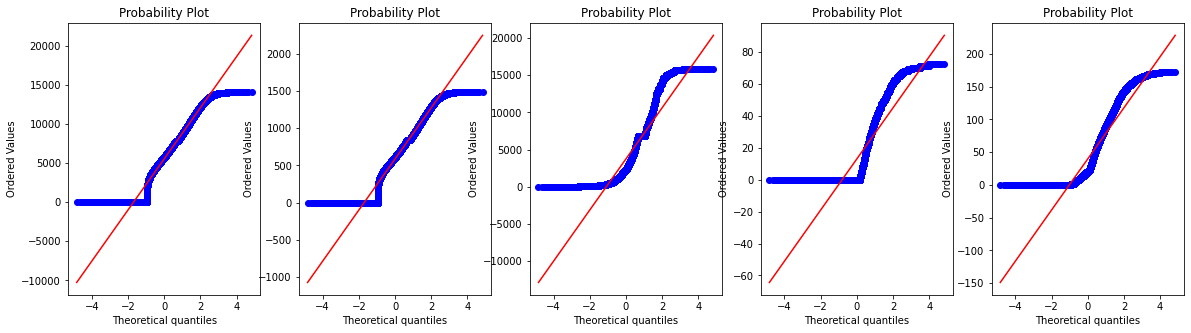

In [157]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(final_df,column)
plt.show()

In [143]:
# Creating 5 different copies to check the distribution of each of the variable
test_df1=final_df.copy()
test_df2=final_df.copy()
test_df3=final_df.copy()
test_df4=final_df.copy()
test_df5=final_df.copy()

Logarithmic Transformation

After Applying Transformation


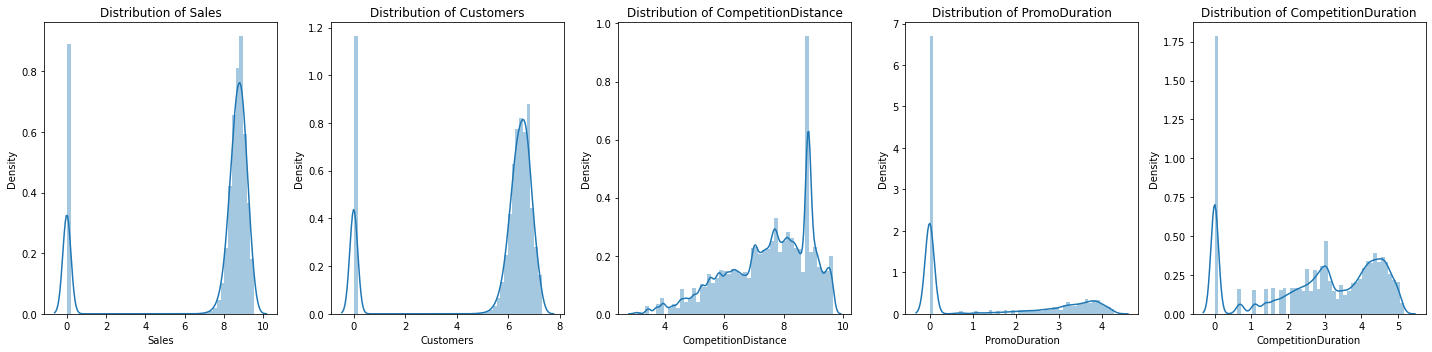

In [144]:
# Applying transformation on the above considered columns
test_df1['Sales']=np.log(test_df1['Sales']+1)
test_df1['Customers']=np.log(test_df1['Customers']+1)
test_df1['CompetitionDistance']=np.log(test_df1['CompetitionDistance']+1)
test_df1['PromoDuration']=np.log(test_df1['PromoDuration']+1)
test_df1['CompetitionDuration']=np.log(test_df1['CompetitionDuration']+1)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df1[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: Sales
Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: PromoDuration
Q-Q Plot for variable: CompetitionDuration


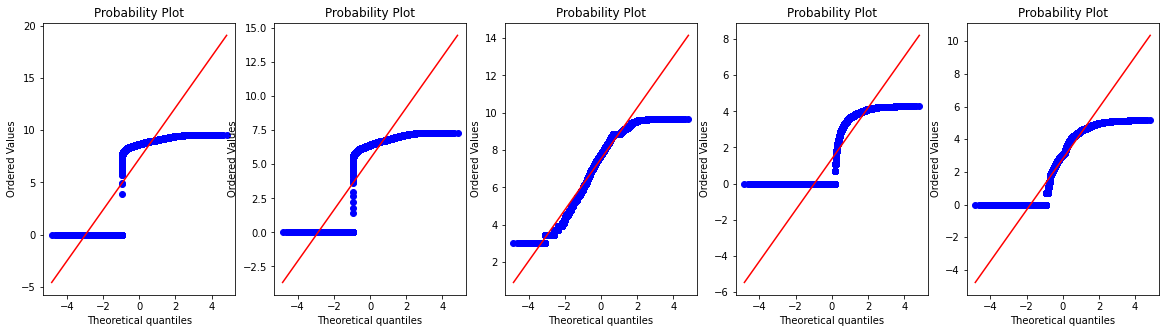

In [156]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df1,column)
plt.show()

Reciprocal Trnasformation

After Applying Transformation


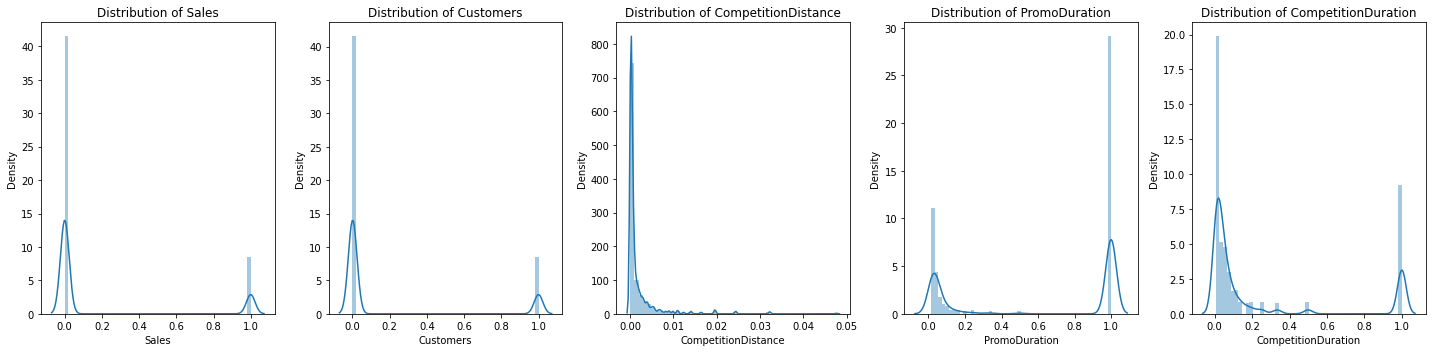

In [145]:
# Applying transformation on the above considered columns
test_df2['Sales']=1/(test_df2['Sales']+1)
test_df2['Customers']=1/(test_df2['Customers']+1)
test_df2['CompetitionDistance']=1/(test_df2['CompetitionDistance']+1)
test_df2['PromoDuration']=1/(test_df2['PromoDuration']+1)
test_df2['CompetitionDuration']=1/(test_df2['CompetitionDuration']+1)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df2[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: Sales
Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: PromoDuration
Q-Q Plot for variable: CompetitionDuration


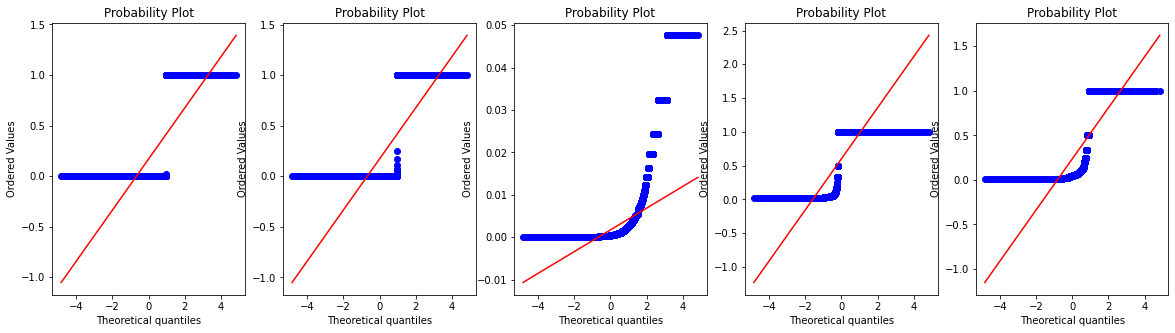

In [158]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df2,column)
plt.show()

Square Root Transformation

After Applying Transformation


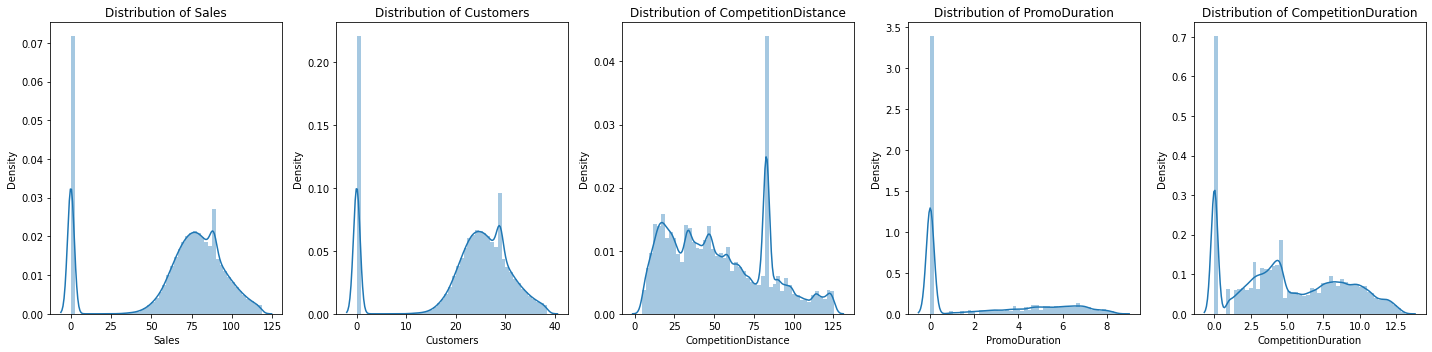

In [146]:
# Applying transformation on the above considered columns
test_df3['Sales']=(test_df3['Sales'])**(1/2)
test_df3['Customers']=(test_df3['Customers'])**(1/2)
test_df3['CompetitionDistance']=(test_df3['CompetitionDistance'])**(1/2)
test_df3['PromoDuration']=(test_df3['PromoDuration'])**(1/2)
test_df3['CompetitionDuration']=(test_df3['CompetitionDuration'])**(1/2)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df3[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: Sales
Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: PromoDuration
Q-Q Plot for variable: CompetitionDuration


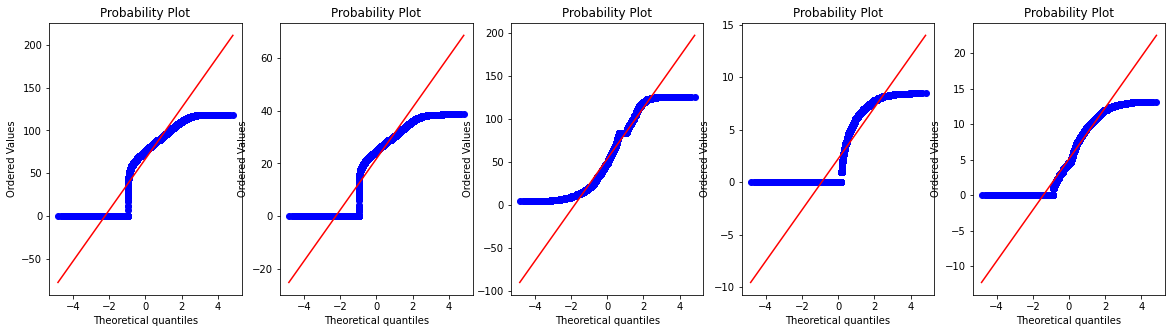

In [159]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df3,column)
plt.show()

Exponential Transformation

In [162]:
# # Applying transformation on the above considered columns
# test_df4['Sales']=np.exp(test_df4['Sales']+1)
# test_df4['Customers']=np.exp(test_df4['Customers']+1)
# test_df4['CompetitionDistance']=np.exp(test_df4['CompetitionDistance']+1)
# test_df4['PromoDuration']=np.exp(test_df4['PromoDuration']+1)
# test_df4['CompetitionDuration']=np.exp(test_df4['CompetitionDuration']+1)

# # Checking the distribution of each continous variable by excluding 0 from our final dataframe
# plt.figure(figsize=(20,5))
# print("After Applying Transformation")
# for n,col in enumerate(cont_variables):
#   plt.subplot(1,5,n+1)
#   sns.distplot(test_df4[col])
#   plt.title(f'Distribution of {col}')
#   plt.tight_layout()

### 6. Data Scaling

In [125]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [126]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [127]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [128]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [129]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [130]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [131]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [132]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [133]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [134]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [135]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [136]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [137]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [138]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***